In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train_data = pd.read_csv("data/fashion-mnist_train.csv")
test_data = pd.read_csv("data/fashion-mnist_test.csv")

it


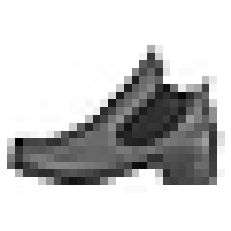

In [2]:
import matplotlib.pyplot as plt
train_data_x = train_data.values[:,1:]
plt.imshow(train_data_x[1].reshape(28, 28), cmap="binary")
plt.axis("off")
plt.show()

In [3]:
label_map = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'boot']
train_data_y = []
train_data_y_string = []
for y in train_data.values[:,:1]:
    train_data_y.append(y[0])
    train_data_y_string.append(label_map[y[0]])
print(train_data_y_string[1])

boot


In [4]:
train_data_x_tiny = train_data_x[:10000]
train_data_y_tiny = train_data_y[:10000]

from sklearn.svm import SVC
svc = SVC()
svc.fit(train_data_x_tiny, train_data_y_tiny)

SVC()

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc, train_data_x_tiny, train_data_y_tiny, cv=3, scoring="accuracy")

array([0.85392921, 0.8559856 , 0.84758476])

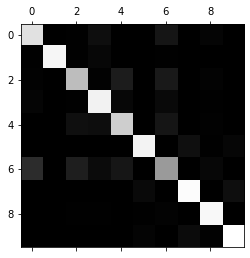

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

predict = cross_val_predict(svc, train_data_x_tiny, train_data_y_tiny, cv=3)
conf = confusion_matrix(train_data_y_tiny, predict)
plt.matshow(conf, cmap=plt.cm.gray)
plt.show()

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_neighbors': [3, 5, 8], 'weights': ['uniform', 'distance']}
]

neighbor = KNeighborsClassifier()
grid_search = GridSearchCV(neighbor, param_grid, cv=3, return_train_score=True)
grid_search.fit(train_data_x_tiny, train_data_y_tiny)
print(grid_search.best_params_)
print(grid_search.best_score_)
final_model = grid_search.best_estimator_

{'n_neighbors': 5, 'weights': 'distance'}
0.8149999763023693


In [12]:
cross_val_score(final_model, train_data_x_tiny, train_data_y_tiny, cv=3, scoring="accuracy")

array([0.81523695, 0.81218122, 0.81758176])

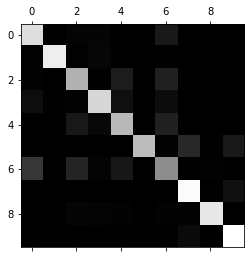

In [13]:
predict = cross_val_predict(final_model, train_data_x_tiny, train_data_y_tiny, cv=3)
conf = confusion_matrix(train_data_y_tiny, predict)
plt.matshow(conf, cmap=plt.cm.gray)
plt.show()